In [2]:
import h5py
import numpy as np

def file_to_list(name):
    f = h5py.File(name, 'r')
    group_key = list(f.keys())[0]
    return np.array(list(f[group_key]))

data = file_to_list('data/data_train.h5')


In [3]:
data_test = file_to_list('data/data_test.h5')

In [6]:
from torch.utils.data import DataLoader
import util
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

from torchvision import transforms
img_transform = transforms.Compose([
#     transforms.Resize(64),
    transforms.ToTensor(),
])
    
data_train = util.NotSoCLEVRDataset(csv_file='data/data_train.csv',
                                    img_file=data,
                                    transform=img_transform)

train_loader = DataLoader(data_train, batch_size=64, 
                          shuffle=True, num_workers=4)

data_test = util.NotSoCLEVRDataset(csv_file='data/data_test.csv',
                                    img_file=data_test,
                                    transform=img_transform)

test_loader = DataLoader(data_test, batch_size=64, 
                          shuffle=False, num_workers=4)

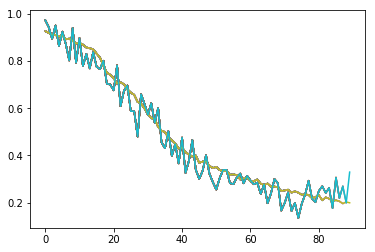

In [52]:
# import model
# from sklearn.metrics import accuracy_score
# from IPython import display

# model_ = model.RelationalNetwork()
# model_.to(device)

# num_epochs = 10
# train_loss_history = []
# test_loss_history = []
# rel_acc_history = []
# non_rel_acc_history = []
freq = 300

for epoch in range(num_epochs):
    running_loss = 0.0
    
    for n_batch, batch in enumerate(train_loader):
        images = batch['image'].to(device)
        tasks = torch.stack(batch['question']).t().float().to(device)
        target = batch['answer'].to(device)
        loss, preds = model_.train(images, tasks, target)
        
        running_loss += loss.item()
        
        if n_batch % freq == freq-1:    
            train_loss_history.append(running_loss / freq)
          
            rel_correct = 0
            rel_total = 0.0
            non_rel_correct = 0
            non_rel_total = 0.0
            test_loss = 0.0
            with torch.no_grad():
                # Get test set performance
                for data in test_loader:
                    images = batch['image'].to(device)
                    tasks = torch.stack(batch['question']).t().float().to(device)
                    target = batch['answer'].to(device)
                    types = batch['type']

                    loss, preds = model_.test(images, tasks, target)
                    c = (preds == target).squeeze()
                    test_loss += loss.item()

                    rel_correct += c[types == 1].sum().cpu().data.tolist()
                    non_rel_correct += c[types == 0].sum().cpu().data.tolist()
                    rel_total += c[types == 1].size()[0]
                    non_rel_total += c[types == 0].size()[0]
                    
            # Keep track of performance metrics
            print('[%d, %5d] train loss: %.3f, test loss: %.3f' %
                  (epoch + 1, n_batch + 1, running_loss / freq,
                  test_loss / len(test_loader)))
            print('Test - relational: %s, non-relational: %s' %
                          (rel_correct / rel_total, 
                           non_rel_correct / non_rel_total))
            rel_acc_history.append(rel_correct / rel_total)
            non_rel_acc_history.append(non_rel_correct / non_rel_total)
            
            test_loss_history.append(test_loss / len(test_loader))
            running_loss = 0.0

            plt.plot(train_loss_history)
            plt.plot(test_loss_history)
            display.display(plt.gcf())
            display.clear_output(wait=True)
        

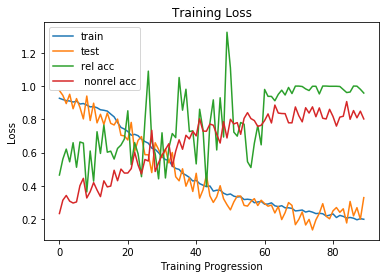

In [53]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot(train_loss_history, label='train')
plt.plot(test_loss_history, label='test')
plt.plot(rel_acc_history, label='rel acc')
plt.plot(non_rel_acc_history, label=' nonrel acc')
plt.ylabel('Loss')
plt.xlabel('Training Progression')
plt.title('Training Loss')
plt.legend()
plt.show()

In [55]:
rel_acc_history

[0.4650337238196663,
 0.5606597012347811,
 0.620812414422638,
 0.5444621938232161,
 0.6593685397481677,
 0.5117145899893504,
 0.6637622228676542,
 0.6568690095846645,
 0.3633256556950739,
 0.6095328555392453,
 0.4281150159744409,
 0.7254332462000194,
 0.5947968963943405,
 0.7655145706263917,
 0.6022364217252396,
 0.6084966755893273,
 0.5609895961333661,
 0.6249556265530707,
 0.6451011714589989,
 0.6817891373801916,
 0.8512924774905606,
 0.5269169329073482,
 0.6599323435444465,
 0.5922313771649571,
 0.45507675524039587,
 0.7894192820898327,
 1.0896772061253719,
 0.6686814610137294,
 0.5927812796822381,
 0.4420833642915521,
 0.7190273340433084,
 0.4472843450479233,
 0.627627375147133,
 0.7143597271392799,
 0.6899231499870477,
 1.0513464171611135,
 0.8549321086261981,
 0.9808306709265175,
 0.7263045793397231,
 0.7307419240326588,
 0.5318319956362503,
 0.8605866976474005,
 0.7353567625133121,
 0.3970374673250073,
 0.7759014148790506,
 0.9170297221415432,
 0.6156303760137626,
 0.92961564527

In [56]:
import pandas as pd
a = pd.read_csv('data/data_test.csv')

In [70]:
(a.type == 1).sum()/(a.type == 0).sum() 

0.7661603673613564

In [73]:
np.append(rel_acc_history[:60] * np.array(0.7661603673613564), rel_acc_history[60:])

array([0.35629041, 0.42955524, 0.47564187, 0.41714535, 0.50518204,
       0.39205544, 0.50854831, 0.503267  , 0.27836572, 0.46699992,
       0.32800476, 0.5557982 , 0.45570981, 0.58650692, 0.46140968,
       0.46620604, 0.429808  , 0.47881623, 0.49425095, 0.52235982,
       0.65222656, 0.40370287, 0.50561401, 0.45374421, 0.34866177,
       0.60482177, 0.83486749, 0.51231723, 0.45416552, 0.33870675,
       0.55089025, 0.34269154, 0.48086322, 0.54731411, 0.52859177,
       0.80549996, 0.6550151 , 0.75147359, 0.55646578, 0.5598655 ,
       0.4074686 , 0.65934742, 0.56340121, 0.30419437, 0.59446491,
       0.70259183, 0.4716716 , 0.71223466, 0.53123988, 1.01402245,
       0.85020139, 0.55386362, 0.53540591, 0.59817158, 0.59040856,
       0.417618  , 0.39088982, 0.50244248, 0.58407149, 0.49535675,
       0.97966889, 0.93818586, 0.93769968, 0.91160809, 0.95003195,
       0.97515087, 0.94609914, 0.99155637, 0.95496238, 0.99966949,
       0.99978701, 0.99720447, 0.9828137 , 0.97304313, 0.99874